In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from scipy.spatial.distance import cdist

In [3]:
data = np.loadtxt("/content/drive/MyDrive/PatternLab/Dataset/data_k_mean.txt")

In [4]:
data

array([[-7.87157, -4.86573],
       [-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

In [5]:
len(data)

3000

In [6]:
x = data[:, 0]
y = data[:, 1]
print(x)
print(y)

[-7.87157 -4.76661 -6.67986 ...  6.91832 -8.23828 -5.75112]
[-4.86573 -6.87944 -5.8308  ... -0.32132 -4.00405 -5.99531]


In [7]:
print(len(x))
print(len(y))

3000
3000


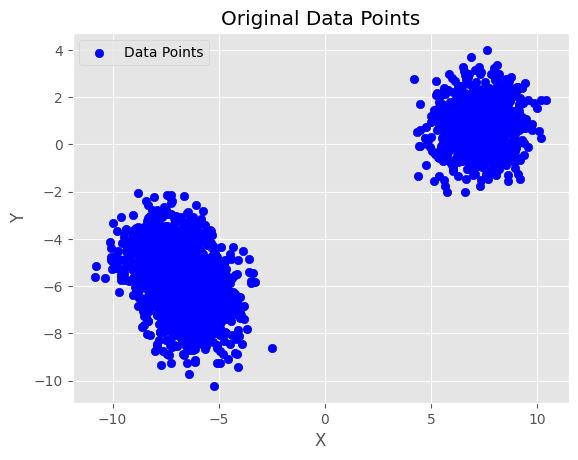

In [8]:
plt.scatter(x, y, c='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data Points')
plt.legend()
plt.show()

In [9]:
def kmeans(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]

    distances = cdist(x, centroids, 'euclidean')

    points = np.array([np.argmin(i) for i in distances])

    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)

        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points

In [10]:
k= 2
iteration= 500

In [11]:
points = kmeans(data,k,iteration)
points

array([0, 0, 0, ..., 1, 0, 0])

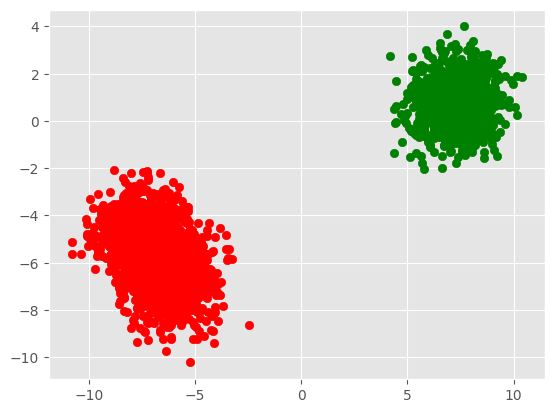

In [14]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
for i in range(len(data)):
  if(points[i]):
     plt.scatter(x[i], y[i], color='green')
  else:
    plt.scatter(x[i], y[i], color='red')


plt.show()